In [1]:
# To access python data science libraries and visualise data and render plots in the Jupyter Notebook
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
pd2 = pd.read_excel(xls, sheet_name=4, header=1)

In [6]:
df = pd.DataFrame(pd2)

In [7]:
df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [9]:
df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [13]:
# check that the customer id is unique
pd.Series(df['customer_id']).is_unique

True

In [14]:
# check there are no duplicate properties
df.duplicated(subset=['address','postcode'], keep='first').value_counts()

False    3999
dtype: int64

In [17]:
# show the frequency of different postcodes
df['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [19]:
# show the frequency of different states
df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [20]:
df['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'}, inplace=True)

In [21]:
df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [23]:
# show the frequency of country to which the property belong to
df['country'].value_counts()

Australia    3999
Name: country, dtype: int64

Text(0, 0.5, 'property valuation')

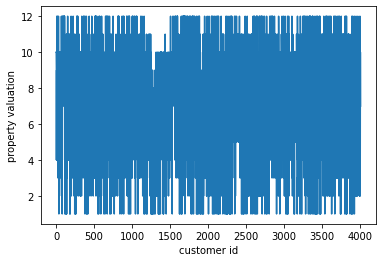

In [33]:
# visualise the valuation prices of properties
x = df['customer_id']
y = df['property_valuation']

plt.plot(x, y)
plt.xlabel('customer id')
plt.ylabel('property valuation')

In [34]:
# checking that the column names are in the correct format
df.columns = map(str.lower, df.columns)
df.columns = map(str.strip, df.columns)

In [ ]:
#print to csv file after the cleaning
df2.to_csv('.csv',index=False)